In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML

from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [5]:
def impulse(n):
    return 1. if n == 0. else 0.

def step(n):
    return 1. if n >= 0. else 0.

def sine(w0, n):
    return np.sin(w0 * n) if n >= 0. else 0.

def get_impulse_response(h, n=(-5, 25)):
    print n
    _h = np.zeros(n[1] - n[0])
    
    for i in xrange(len(h)):
        _h[np.abs(n[0]) + i] = h[i]
    return _h
    
def convolve(n, h):
    k = np.arange(-5, 25)
    _h = get_impulse_response(h, (k[0], k[-1] + 1))
    # input
    _x = np.array([sine(0.764, n - _k) for _k in k])
    # product of impulse response and input
    _y = np.array([_h[i] * _x[i] for i in xrange(len(_x))])
    fig = plt.figure(figsize=(15, 9))
    subplot(311)
    stem(k, _h)
    gca().set_ylim((np.min(_h) - 0.5, np.max(_h) + 0.5))
    gca().set_xlim((k[0], k[-1]))
    subplot(312)
    stem(k, _x)
    gca().set_ylim((np.min(_x) - 0.5, np.max(_x) + 0.5))
    gca().set_xlim((k[0], k[-1]))
    subplot(313)
    stem(k, _y)
    gca().set_xlim((k[0], k[-1]))
    plt.show()
    

(-5, 25)


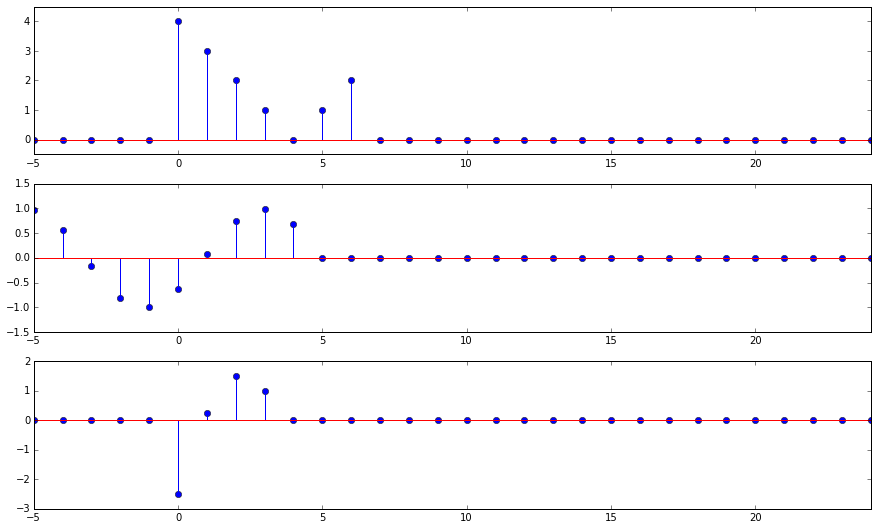

In [6]:
interactive(convolve, n=(-5, 25), h=fixed([4,3,2,1,0,1,2]))